In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
twt = pd.read_csv('Corona_NLP_train.csv')

In [3]:
twt.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [4]:
twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
twt.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [6]:
twt['TextLength'] = twt['OriginalTweet'].apply(len)

In [7]:
twt

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TextLength
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,138
41154,44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive,135
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,111


In [12]:
sns.set_style('dark')

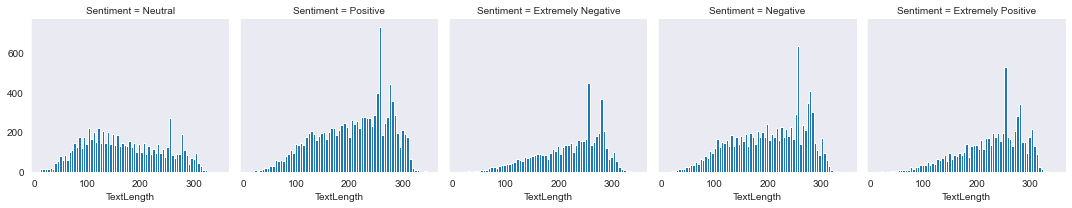

In [18]:
g = sns.FacetGrid(twt, col='Sentiment')
g.map(plt.hist, 'TextLength', bins=70)

<AxesSubplot:xlabel='Sentiment', ylabel='TextLength'>

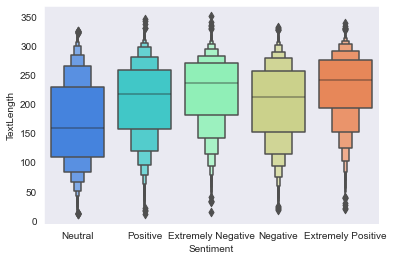

In [21]:
sns.boxenplot(x='Sentiment', y='TextLength', data=twt, palette="rainbow")

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

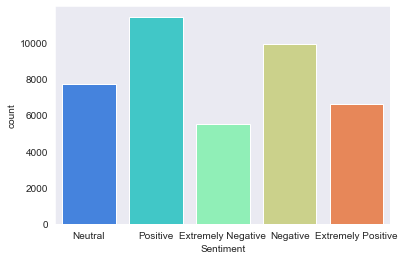

In [22]:
sns.countplot(x='Sentiment', data=twt, palette='rainbow')

<AxesSubplot:>

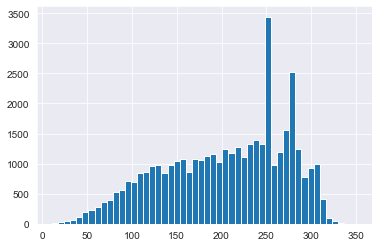

In [24]:
twt['TextLength'].hist(bins=50)

In [26]:
twt.groupby('Sentiment').mean()

,UserName,ScreenName,TextLength
Sentiment,,,
Extremely Negative,22983.268747,67935.268747,221.116037
Extremely Positive,25043.485356,69995.485356,227.933424
Negative,23907.040738,68859.040738,203.011798
Neutral,24998.262025,69950.262025,167.920264
Positive,24647.796183,69599.796183,206.765190


In [28]:
twt.groupby('Sentiment').corr()

UserName  ScreenName  TextLength
Sentiment                                                      
Extremely Negative UserName    1.000000    1.000000   -0.046375
                   ScreenName  1.000000    1.000000   -0.046375
                   TextLength -0.046375   -0.046375    1.000000
Extremely Positive UserName    1.000000    1.000000   -0.028751
                   ScreenName  1.000000    1.000000   -0.028751
                   TextLength -0.028751   -0.028751    1.000000
Negative           UserName    1.000000    1.000000   -0.049986
                   ScreenName  1.000000    1.000000   -0.049986
                   TextLength -0.049986   -0.049986    1.000000
Neutral            UserName    1.000000    1.000000   -0.001585
                   ScreenName  1.000000    1.000000   -0.001585
                   TextLength -0.001585   -0.001585    1.000000
Positive           UserName    1.000000    1.000000   -0.028525
                   ScreenName  1.000000    1.000000   -0.028525
                   TextLength -0.028525   -0.028525    1.000000

# Feature Engineering

In [29]:
twt_new = twt[(twt['Sentiment'] == 'Positive') | (twt['Sentiment'] == 'Neutral') | (twt['Sentiment'] == 'Negative')]

In [30]:
twt_new.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TextLength
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive,249
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,180
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,119
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,280
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,267
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral,276


In [34]:
twt_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29052 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       29052 non-null  int64 
 1   ScreenName     29052 non-null  int64 
 2   Location       23045 non-null  object
 3   TweetAt        29052 non-null  object
 4   OriginalTweet  29052 non-null  object
 5   Sentiment      29052 non-null  object
 6   TextLength     29052 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.8+ MB


In [35]:
twt_new.count()

UserName         29052
ScreenName       29052
Location         23045
TweetAt          29052
OriginalTweet    29052
Sentiment        29052
TextLength       29052
dtype: int64

In [36]:
t = pd.read_csv('Corona_NLP_test.csv')

In [37]:
t.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [38]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


# Split


In [39]:
X = twt_new['OriginalTweet']
y = twt_new['Sentiment']

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [44]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [47]:
nb = MultinomialNB()
sv = SVC()
dtc = DecisionTreeClassifier()

In [49]:
nb.fit(X_train, y_train)

MultinomialNB()

In [50]:
sv.fit(X_train, y_train)

SVC()

In [51]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
predictions_nb = nb.predict(X_test)
predictions_sv = sv.predict(X_test)
predictions_dtc = dtc.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [55]:
print(confusion_matrix(y_test, predictions_nb))

[[1757  136 1107]
 [ 514  838  962]
 [ 631  205 2566]]


In [56]:
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

    Negative       0.61      0.59      0.60      3000
     Neutral       0.71      0.36      0.48      2314
    Positive       0.55      0.75      0.64      3402

    accuracy                           0.59      8716
   macro avg       0.62      0.57      0.57      8716
weighted avg       0.61      0.59      0.58      8716



In [62]:
print(confusion_matrix(y_test, predictions_sv))

[[1738  434  828]
 [ 278 1549  487]
 [ 569  444 2389]]


In [58]:
print(classification_report(y_test, predictions_sv))

              precision    recall  f1-score   support

    Negative       0.67      0.58      0.62      3000
     Neutral       0.64      0.67      0.65      2314
    Positive       0.64      0.70      0.67      3402

    accuracy                           0.65      8716
   macro avg       0.65      0.65      0.65      8716
weighted avg       0.65      0.65      0.65      8716



In [63]:
print(confusion_matrix(y_test, predictions_dtc))

[[1575  584  841]
 [ 460 1350  504]
 [ 876  638 1888]]


In [61]:
print(classification_report(y_test, predictions_dtc))

              precision    recall  f1-score   support

    Negative       0.54      0.53      0.53      3000
     Neutral       0.52      0.58      0.55      2314
    Positive       0.58      0.55      0.57      3402

    accuracy                           0.55      8716
   macro avg       0.55      0.55      0.55      8716
weighted avg       0.55      0.55      0.55      8716



In [64]:
print(accuracy_score(y_test, predictions_nb))
print(accuracy_score(y_test, predictions_sv))
print(accuracy_score(y_test, predictions_dtc))

0.5921294171638366
0.6512161541991739
0.5522028453419


In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [69]:
pipe = Pipeline([('bow', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
                ('classifier',SVC())
                ])


In [71]:
X = twt_new['OriginalTweet']
y = twt_new['Sentiment']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [73]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [75]:
pred = pipe.predict(X_test)

In [ ]:
print(accuracy_score(y_test, pred))